#Titanic Data ETL

In [ ]:
#importing the necessary python variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 6.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
df_test = pd.read_excel("titanic3.xls")
df_test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#dimension of the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
#total number of passengers inside the titanic
print('The total number of passengers inside the ship was ' +str(len(df_test)))

The total number of passengers inside the ship was 1309


In [ ]:
#categorical values in the dataset
C_A = df_test.select_dtypes(include=['object'])
C_A.head()

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
#numerical attributes in the dataset
N_A = df_test.select_dtypes(include = ['int', 'float'])
N_A.head()

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN


#Data Cleaning & Data Wrangling

In [ ]:
#Number of missing values per column 
df_test.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

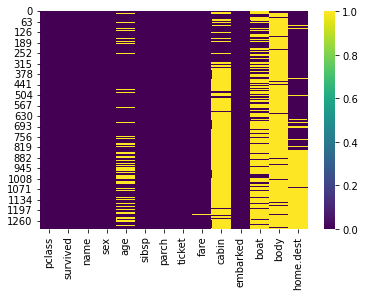

In [ ]:
sns.heatmap(df_test.isnull(), cmap='viridis')

In [ ]:
#removing irrelevant columns with missing values (C_A dataframe)
C_A.drop(['cabin'], axis=1, inplace=True)
C_A.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,sex,ticket,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,S,NaN,"Montreal, PQ / Chesterville, ON"


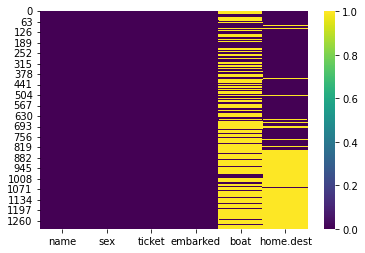

In [ ]:
#To validate that there is no more missing values in Categorical atrributes.
sns.heatmap(C_A.isnull(), cmap='viridis')

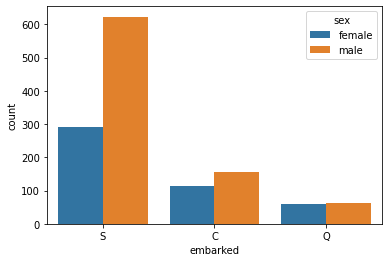

In [ ]:
sns.countplot(x='embarked', hue='sex', data=C_A)

In [ ]:
#dropping irrelvant columns in the N_A dataframe
N_A.drop('body', axis=1, inplace=True)
N_A.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


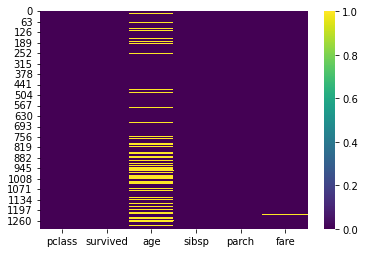

In [ ]:
sns.heatmap(N_A.isnull(), cmap='viridis')

In [ ]:
N_A.isnull().sum()

pclass        0
survived      0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

In [ ]:
N_A.dropna(inplace=True)
N_A.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


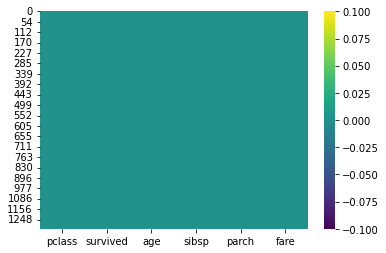

In [ ]:
sns.heatmap(N_A.isnull(), cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd39f018c50>,
      dtype=object)

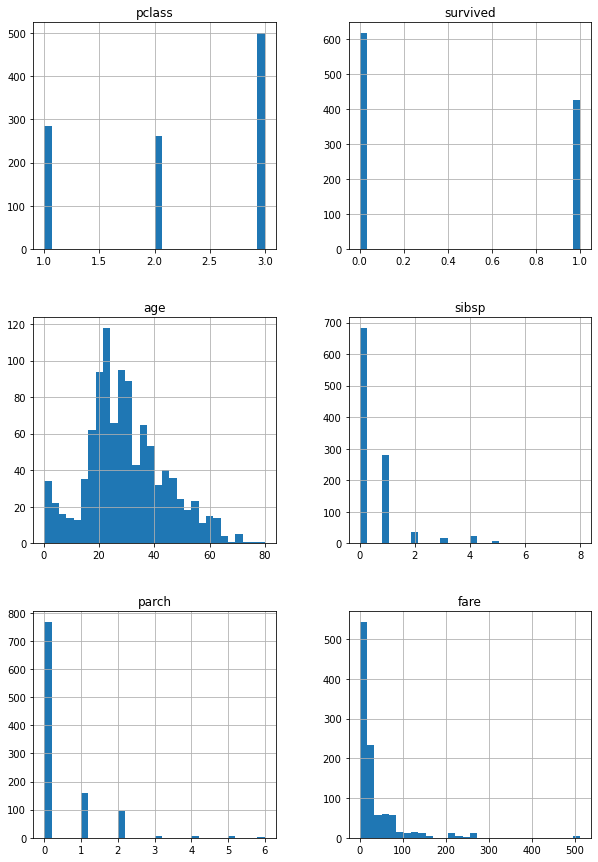

In [ ]:
N_A.hist(bins=30, figsize=(10,15))

The age distribution is skewed to the right. Majority of the passengers are in the age bracket 22 to 25 years and the oldest passenger is of age 80 years.

In [ ]:
df_test.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
#removing irrelevant columns
df_test.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [ ]:
df_test.head()

,pclass,survived,sex,age,embarked
0,1,1,female,29.0000,S
1,1,1,male,0.9167,S
2,1,0,female,2.0000,S
3,1,0,male,30.0000,S
4,1,0,female,25.0000,S


In [ ]:
#To check the status of the dataset after removing irrelevant columns
df_test.isnull().sum()

pclass        0
survived      0
sex           0
age         263
embarked      2
dtype: int64

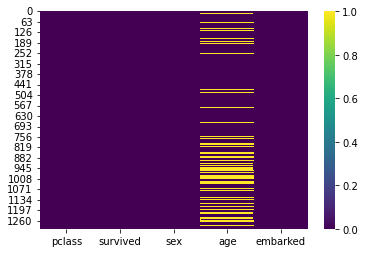

In [ ]:
sns.heatmap(df_test.isnull(), cmap='viridis')

In [ ]:
df_test.dropna(inplace=True)

In [ ]:
df_test.isnull().sum()

pclass      0
survived    0
sex         0
age         0
embarked    0
dtype: int64

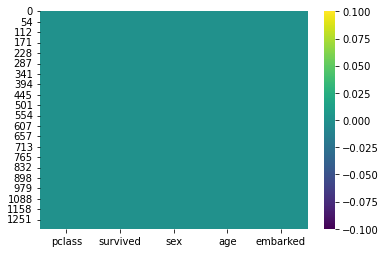

In [ ]:
sns.heatmap(df_test.isnull(), cmap='viridis')

#Explaratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd39ea3d250>,
      dtype=object)

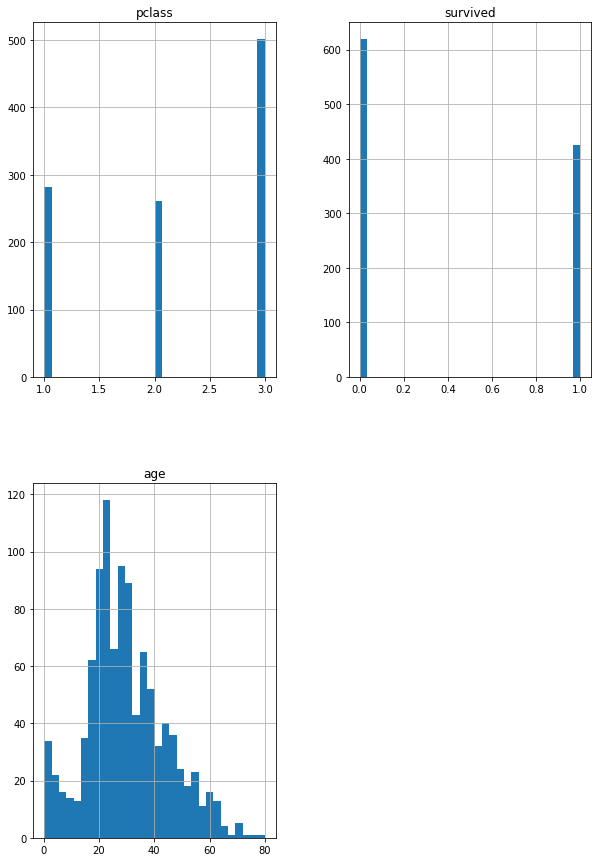

In [ ]:
df_test.hist(bins=30, figsize=(10,15))

From the charts, we obtained the following information:

The top left output chart tells about age distribution of the passengers, which is skewed to the right. Majority of the passengers are in the age bracket 22 to 25 years and the oldest passenger is of age 80 years.
The top right output chart reveals that large proporton of the passengers belong to pclass_3 category.
The down left output chart shows that majority of the passengers could not survive it.

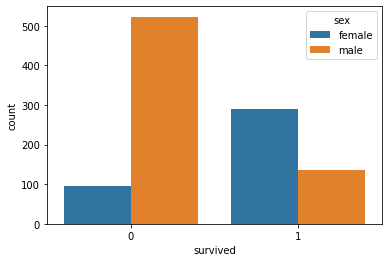

In [ ]:
sns.countplot(x = "survived", hue='sex', data = df_test)

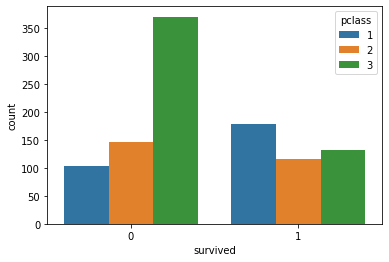

In [ ]:
sns.countplot(x = "survived", hue='pclass', data = df_test)

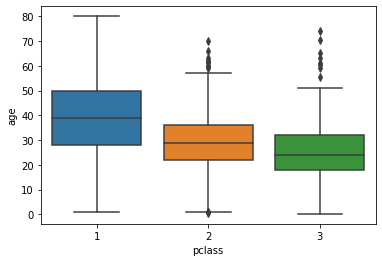

In [ ]:
sns.boxplot(x='pclass', y='age', data=df_test)

In [ ]:
pd.get_dummies(df_test['sex'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1301,0,1
1304,1,0
1306,0,1
1307,0,1


In [ ]:
sex = pd.get_dummies(df_test['sex'], drop_first=True)

In [ ]:
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [ ]:
embarked = pd.get_dummies(df_test['embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
pclass = pd.get_dummies(df_test['pclass'], drop_first=True)
pclass.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
df = pd.concat([df_test, sex, embarked, pclass], axis=1)
df.drop("embarked", axis=1)
df.head()

,pclass,survived,sex,age,embarked,male,Q,S,2,3
0,1,1,female,29.0000,S,0,0,1,0,0
1,1,1,male,0.9167,S,1,0,1,0,0
2,1,0,female,2.0000,S,0,0,1,0,0
3,1,0,male,30.0000,S,1,0,1,0,0
4,1,0,female,25.0000,S,0,0,1,0,0


In [ ]:
df = df.drop("embarked", axis=1)
df.head()

,pclass,survived,sex,age,male,Q,S,2,3
0,1,1,female,29.0000,0,0,1,0,0
1,1,1,male,0.9167,1,0,1,0,0
2,1,0,female,2.0000,0,0,1,0,0
3,1,0,male,30.0000,1,0,1,0,0
4,1,0,female,25.0000,0,0,1,0,0


In [ ]:
df.drop("sex", axis=1, inplace=True)
df.head()

,pclass,survived,age,male,Q,S,2,3
0,1,1,29.0000,0,0,1,0,0
1,1,1,0.9167,1,0,1,0,0
2,1,0,2.0000,0,0,1,0,0
3,1,0,30.0000,1,0,1,0,0
4,1,0,25.0000,0,0,1,0,0


#Logistics Regression Analysis

In [ ]:
#first, we define the dependent and the independent variables, then import necessary modules and libraries
X = df.drop('survived', axis=1)
y = df['survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [ ]:
prediction = logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,prediction)

array([[143,  37],
       [ 35,  99]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, prediction)

0.7707006369426752

The logistics model created for predictions has approximately 78% accuracy and 80% precision.

## Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1 = df.drop(['survived'], axis=1)
y1 = df['survived']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc_model = rfc.fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
rfc_prediction = rfc_model.predict(X1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y1_test, rfc_prediction)

0.7420382165605095

The logistics model created for predictions has approximately 74% accuracy and 80% precision.